In [1]:
##### from collections import defaultdict
import util
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as stats
from d4j import NAMES

def load_by_size(load_func, name, dir_name):
    keys = [0.1, 0.2, 0.3, 0.4, 0.5, "<50"]
    klass = {k: [] for k in keys}
    method = {k: [] for k in keys}
    stmt = {k: [] for k in keys}
    
    for bug_id in os.listdir(os.path.join(dir_name, name)):
        for ratio in keys:
            data = load_func(name, bug_id, ratio if ratio != "<50" else "max50")
            if data is None:
                klass[ratio].append(None)
                method[ratio].append(None)
                stmt[ratio].append(None)
                continue
            
            bugs = data["is_bug"] == "True"
            if sum(bugs) == len(bugs):
                klass[ratio].append(None)
                method[ratio].append(None)
                stmt[ratio].append(None)
                continue
                
            def corr(to, key):
                cor, p = stats.pointbiserialr(bugs, data[key])
                to[ratio].append(cor if p < 0.05 else None)
                
            corr(klass, "cls_level")
            corr(method, "method_level")
            corr(stmt, "stmt_level")
            
    return pd.DataFrame(klass), pd.DataFrame(method), pd.DataFrame(stmt),

def load(load_func, dir_name):
    result = {}
    for name in NAMES:
        result[name] = load_by_size(load_func, name, dir_name)

    return result

In [2]:
major = load(util.load, "cov")

Ignore constant value Time 13 0.3 ['True']
Ignore constant value Time 13 0.4 ['True']
Ignore constant value Time 13 0.5 ['True']
Ignore constant value Time 1 0.2 ['True']
Ignore constant value Time 1 0.3 ['True']
Ignore constant value Time 1 0.4 ['True']
Ignore constant value Time 1 0.5 ['True']
Ignore constant value Time 22 0.3 [1.]
Ignore constant value Time 22 0.4 [1.]
Ignore constant value Time 22 0.5 [1.]
Ignore constant value Time 26 0.4 ['True']
Ignore constant value Time 26 0.5 ['True']
Ignore constant value Closure 49 0.2 ['True']
Ignore constant value Closure 49 0.3 ['True']
Ignore constant value Closure 49 0.4 ['True']
Ignore constant value Closure 49 0.5 [1.]
Ignore constant value Closure 31 0.4 [1.]
Ignore constant value Closure 31 0.5 [1.]
Ignore constant value Closure 11 0.1 [0.]
Ignore constant value Closure 11 0.2 [0.]
Ignore constant value Closure 11 0.3 [0.]
Ignore constant value Closure 11 0.4 [0.]
Ignore constant value Closure 11 0.5 [0.]
Ignore constant value Clos

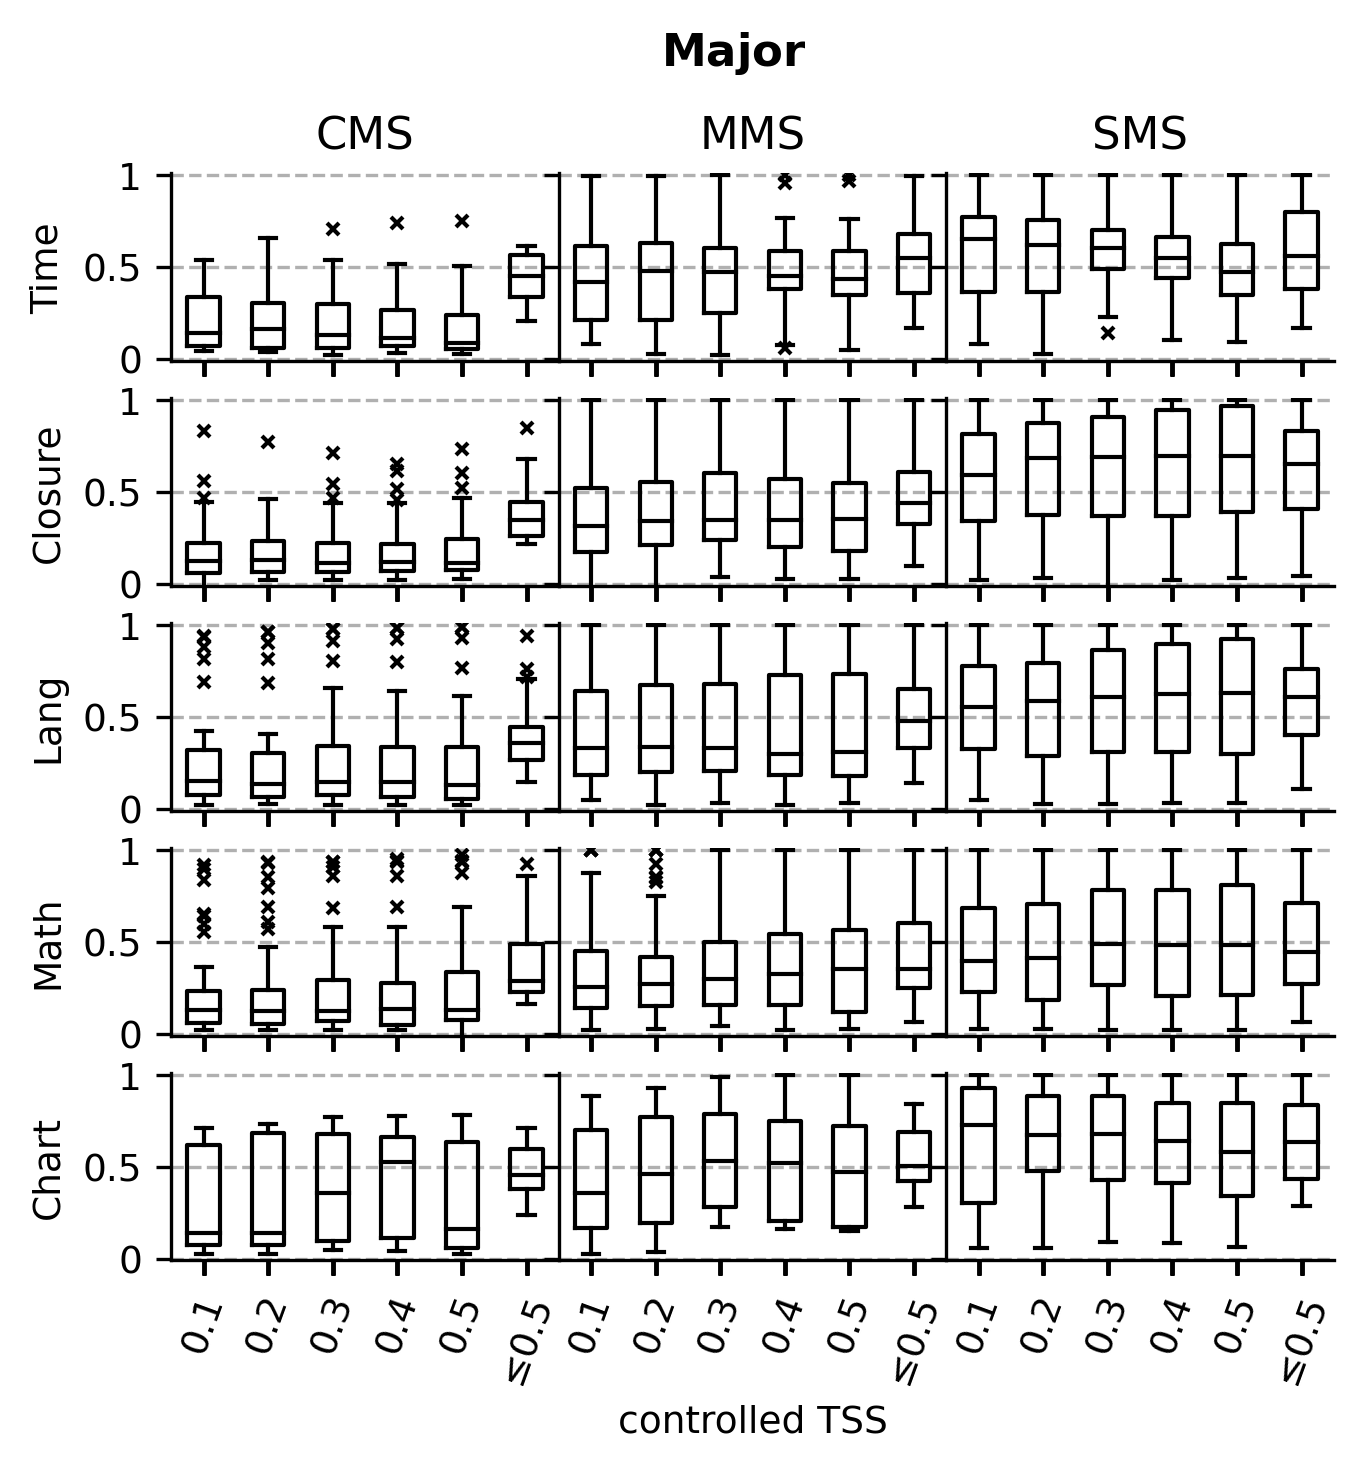

In [22]:
import matplotlib
font = {'size'   : 9}
matplotlib.rc('font', **font)

def draw(data, file_name, title):
    fig, axs = plt.subplots(5, 3, figsize=(5, 4.8,), dpi=300, sharex=True, sharey=True)
    fig.subplots_adjust(wspace=0, hspace=0.2)
    plt.suptitle(r"$\bf{{{a}}}$".format(a=title))
    titles = ["CMS", "MMS", "SMS"]
    for col_idx, name in enumerate(NAMES):
        for idx, df in enumerate(data[name]):
            axis = axs[col_idx, idx]
            axis.set_ylim(-0.01, 1.01)
            axis.spines['right'].set_visible(False)
            axis.spines['top'].set_visible(False)
            df.columns = [0.1, 0.2, 0.3, 0.4, 0.5, "≤0.5"]
            df.boxplot(ax=axis, rot=70, showfliers=True, color = util.colorprops, boxprops=util.boxprops, flierprops=util.flierprops, medianprops=util.medianprops)
#             plt.setp(axis.xaxis.get_majorticklabels(), rotation=60, ha="right")
            axis.get_xaxis().grid(False)
            axis.get_yaxis().grid(True, linestyle='--')
            plt.yticks([0, 0.5, 1], [0, 0.5, 1])

            if idx == 0:
                axis.set_ylabel(name)

            if col_idx == 0:
                axis.set_title(titles[idx])
                
            if col_idx == 4 and idx == 1:
                axis.set_xlabel("controlled TSS")

    plt.savefig('../seke/{}.png'.format(file_name), format='png', dpi=300, bbox_inches='tight')
    plt.show()
    
draw(major, "fig5", "Major")

pit = load(util.load_pit, "cov_pit")

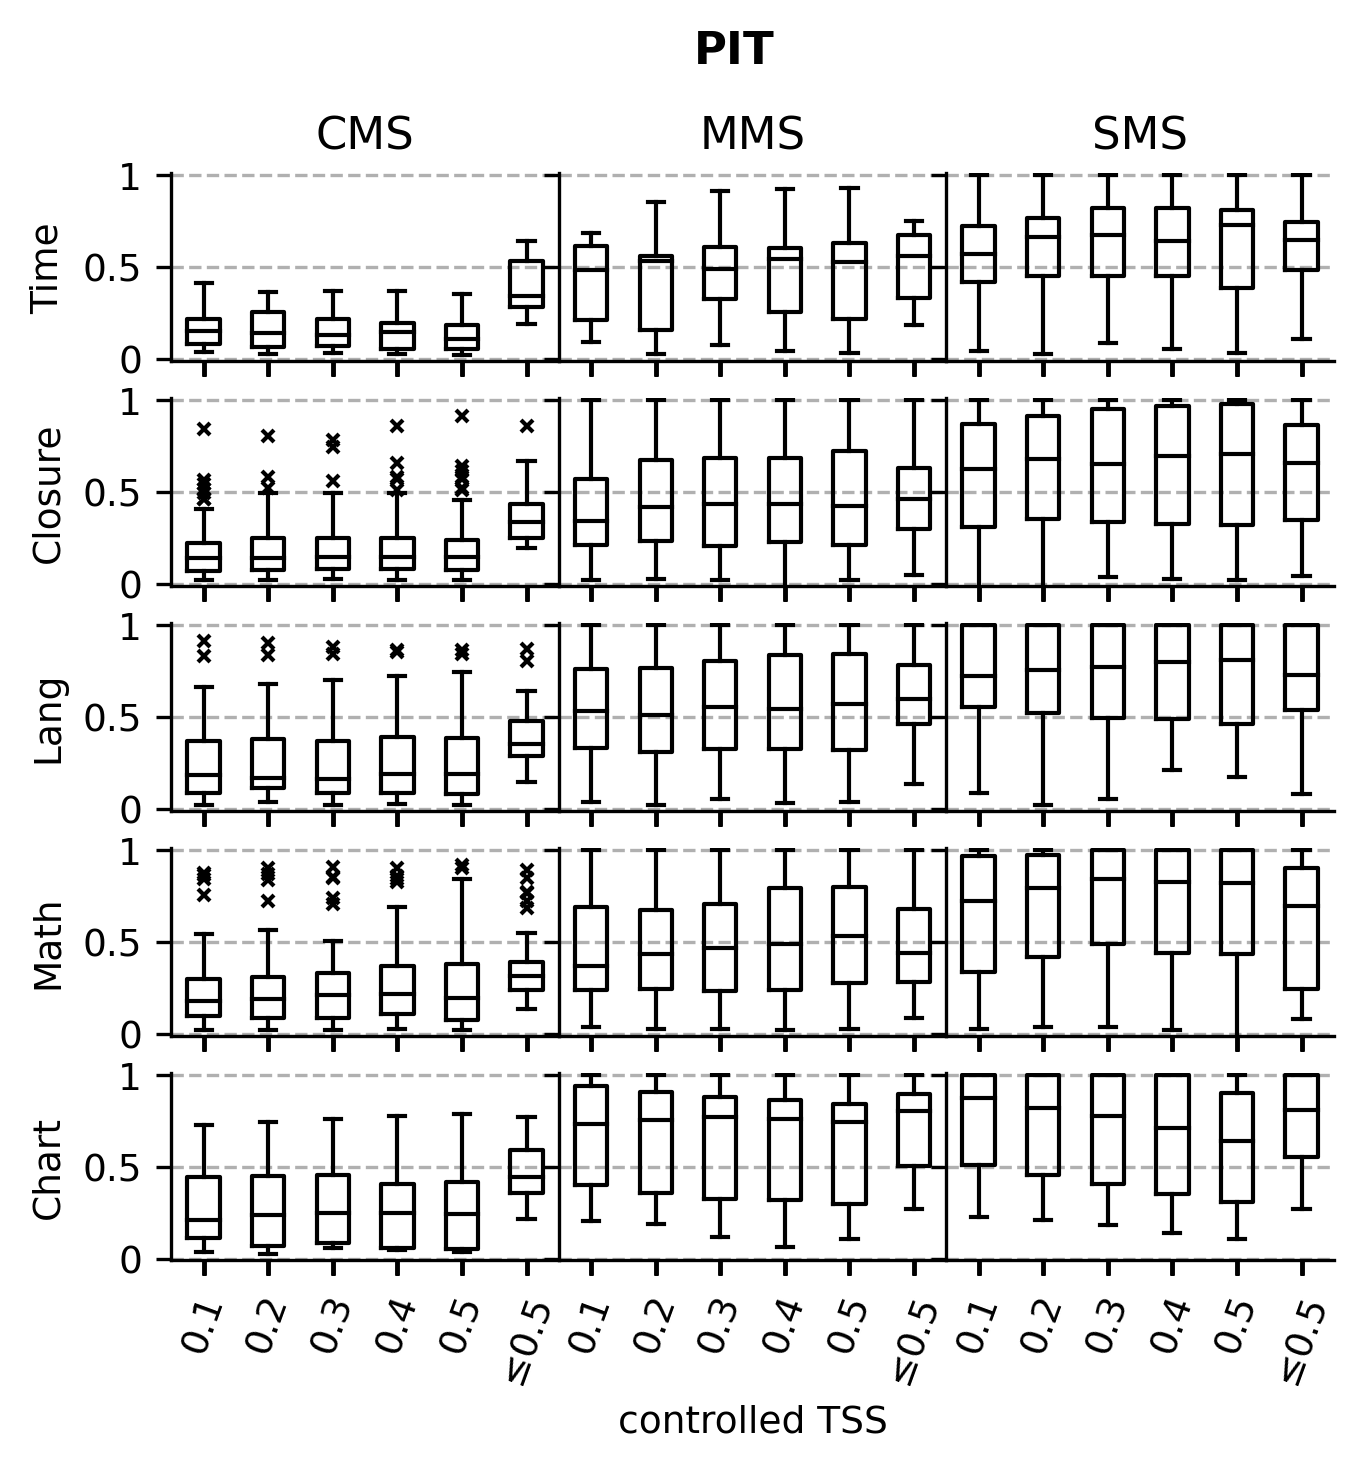

In [23]:
draw(pit, 'fig6', "PIT")